In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')  
print(data.head())

       date   quarter  ... no_of_workers actual_productivity
0  1/1/2015  Quarter1  ...          59.0            0.940725
1  1/1/2015  Quarter1  ...           8.0            0.886500
2  1/1/2015  Quarter1  ...          30.5            0.800570
3  1/1/2015  Quarter1  ...          30.5            0.800570
4  1/1/2015  Quarter1  ...          56.0            0.800382

[5 rows x 15 columns]


In [3]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

The only attribute with missing values is wip, which includes the number of unfinished items per product. Out of 1197 rows, 42.3% have a missing value for this attribute.

We can now look at statistical descriptions for numerical data.

In [4]:
data.describe().T

count         mean  ...          75%           max
team                   1197.0     6.426901  ...     9.000000     12.000000
targeted_productivity  1197.0     0.729632  ...     0.800000      0.800000
smv                    1197.0    15.062172  ...    24.260000     54.560000
wip                     691.0  1190.465991  ...  1252.500000  23122.000000
over_time              1197.0  4567.460317  ...  6960.000000  25920.000000
incentive              1197.0    38.210526  ...    50.000000   3600.000000
idle_time              1197.0     0.730159  ...     0.000000    300.000000
idle_men               1197.0     0.369256  ...     0.000000     45.000000
no_of_style_change     1197.0     0.150376  ...     0.000000      2.000000
no_of_workers          1197.0    34.609858  ...    57.000000     89.000000
actual_productivity    1197.0     0.735091  ...     0.850253      1.120437

[11 rows x 8 columns]

We can see that the actual productivity has a maximum value that exceeds the possible maximum value for that attribute (which is 1).

In [5]:
data.loc[(data['actual_productivity'] >= 1)]

date   quarter  ... no_of_workers actual_productivity
337  1/20/2015  Quarter3  ...           8.0            1.033570
437  1/26/2015  Quarter4  ...          10.0            1.059621
456  1/27/2015  Quarter4  ...          57.0            1.000230
457  1/27/2015  Quarter4  ...          57.0            1.000230
477  1/28/2015  Quarter4  ...          57.0            1.000230
478  1/28/2015  Quarter4  ...          57.0            1.000230
498  1/29/2015  Quarter5  ...          57.0            1.000230
518  1/31/2015  Quarter5  ...          58.0            1.000457
519  1/31/2015  Quarter5  ...          57.0            1.000230
542   2/1/2015  Quarter1  ...           8.0            1.011562
543   2/1/2015  Quarter1  ...          57.5            1.000671
544   2/1/2015  Quarter1  ...          58.5            1.000402
561   2/2/2015  Quarter1  ...          58.5            1.000602
580   2/3/2015  Quarter1  ...          20.0            1.001417
581   2/3/2015  Quarter1  ...          57.5            1.000019
599   2/4/2015  Quarter1  ...          57.5            1.050281
600   2/4/2015  Quarter1  ...          57.0            1.000230
618   2/5/2015  Quarter1  ...          56.5            1.000446
619   2/5/2015  Quarter1  ...          57.5            1.000019
636   2/7/2015  Quarter1  ...          25.0            1.050667
637   2/7/2015  Quarter1  ...          58.0            1.000019
655   2/8/2015  Quarter2  ...          57.5            1.000019
674   2/9/2015  Quarter2  ...          18.0            1.057963
692  2/10/2015  Quarter2  ...           9.0            1.004889
711  2/11/2015  Quarter2  ...          15.0            1.033156
712  2/11/2015  Quarter2  ...           9.0            1.020000
713  2/11/2015  Quarter2  ...          57.5            1.000345
714  2/11/2015  Quarter2  ...          57.0            1.000066
730  2/12/2015  Quarter2  ...          57.0            1.100484
731  2/12/2015  Quarter2  ...          15.0            1.096633
732  2/12/2015  Quarter2  ...          57.5            1.000345
749  2/14/2015  Quarter2  ...          57.0            1.000230
766  2/15/2015  Quarter3  ...           8.0            1.120437
767  2/15/2015  Quarter3  ...           8.0            1.108125
768  2/15/2015  Quarter3  ...          57.0            1.000230
785  2/16/2015  Quarter3  ...          57.0            1.000230
803  2/17/2015  Quarter3  ...          57.0            1.000230

[37 rows x 15 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff12b677390>,
      dtype=object)

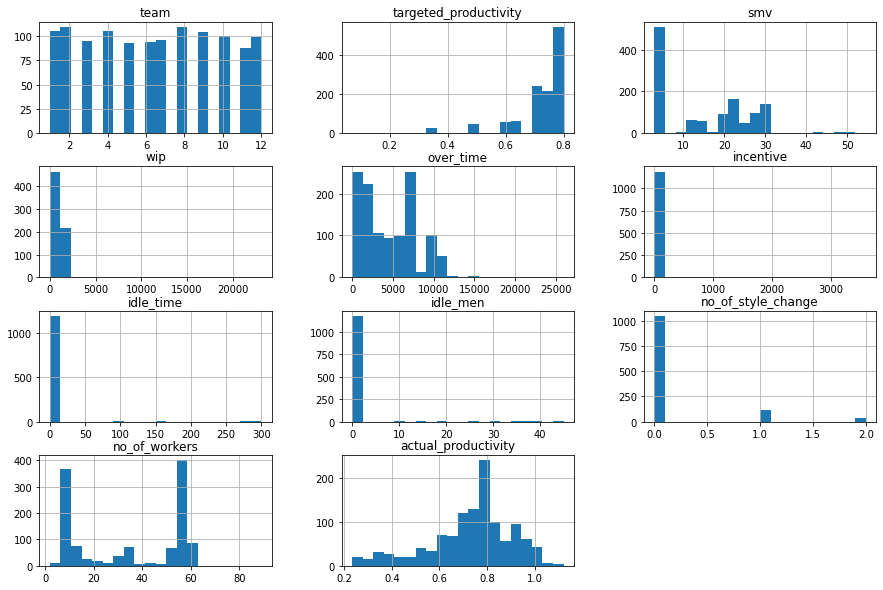

In [6]:
data.hist(bins=20, figsize=(15, 10))

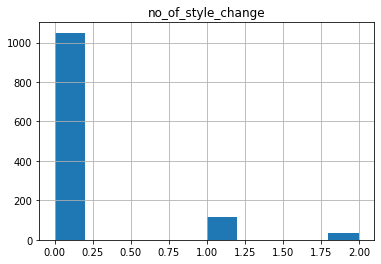

In [7]:
import matplotlib.pyplot as plt
data.hist(column='no_of_style_change')
plt.savefig('histo_style.png')

By looking at the histograms, one can see that no_of_style_change is a categorical attribute rather than a ratio attribute. It is also clear that quite some rows have an associated productivity of more than 1. A decision will need to be taken in this sense.

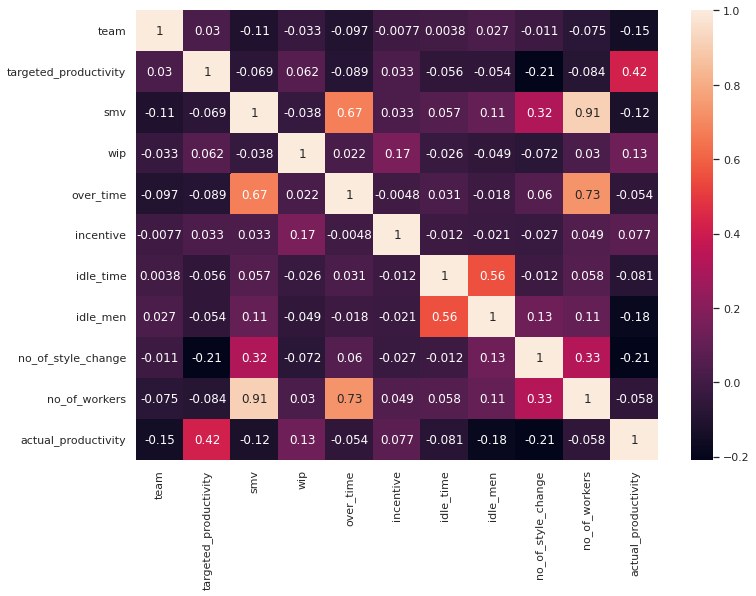

In [8]:
%matplotlib inline

# calculate the correlation matrix
corr = data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

plt.savefig('corr_matrix.png')

The correlation matrix shows some high correlations: especially the one between smv and no_of_workers is very high and equal 0.91. This makes sense since the allocated time for a task is strongly related to the number of workers and vice versa.

Before thinking about data quality, let's fix data types.

In [9]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [10]:
data["team"] = data['team'].astype('str')
data["over_time"] = data['over_time'].astype('float')
data["incentive"] = data['incentive'].astype('float')
data["no_of_style_change"] = data['no_of_style_change'].astype('str')
data["no_of_workers"] = data['no_of_workers'].astype('int')
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                      object
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                   int64
no_of_style_change        object
no_of_workers              int64
actual_productivity      float64
dtype: object

For the data quality report, we will consider the missing value for wip and the problem for maximum value bigger than 1 for actual productivity. Let's analyze the categorical variables.

In [11]:
data.describe(include='object').T

count unique        top  freq
date                1197     59  1/31/2015    24
quarter             1197      5   Quarter1   360
department          1197      3     sweing   691
day                 1197      6  Wednesday   208
team                1197     12          8   109
no_of_style_change  1197      3          0  1050

In [12]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

The two "finishing" department labels are separated even though they refer to the same element. 

In [51]:
data.replace("finishing ", 
           "finishing", 
           inplace=True)
data['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [14]:
data['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [15]:
data['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [16]:
data['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

An important aspect to consider is why missing data is missing: the wip attribute describes the number of unfinished items per product. The fact that data is missing could be due to missing inputation (eg. the supervisor forgot to do it) and should be treated by, for example, decide for inputation by means of mean value of the attribute from the same team.

In [17]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 25.9 MB 146 kB/s
     |████████████████████████████████| 10.9 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 72.3 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 675 kB 55.6 MB/s 
     |████████████████████████████████| 4.7 MB 44.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 73.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=9320df3ed65faa6023341ddf4a5df288a92abd8245cc4fe74e3b4e7d5616ce2f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8vg91cvw/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=1f8ab85f2c51c4f1fd887bd230d6f2817d71e7d4499998ed099e2f5aa262335e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [18]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)

In [19]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data exploration. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff11b624690>,
      dtype=object)

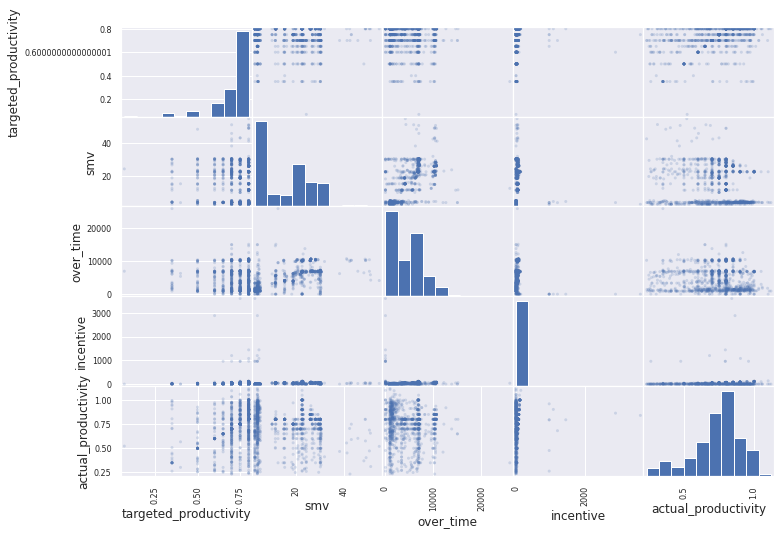

In [20]:
pd.plotting.scatter_matrix(data[["targeted_productivity", "smv", "over_time", "incentive", "actual_productivity"]], alpha=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff11f4d2ad0>,
      dtype=object)

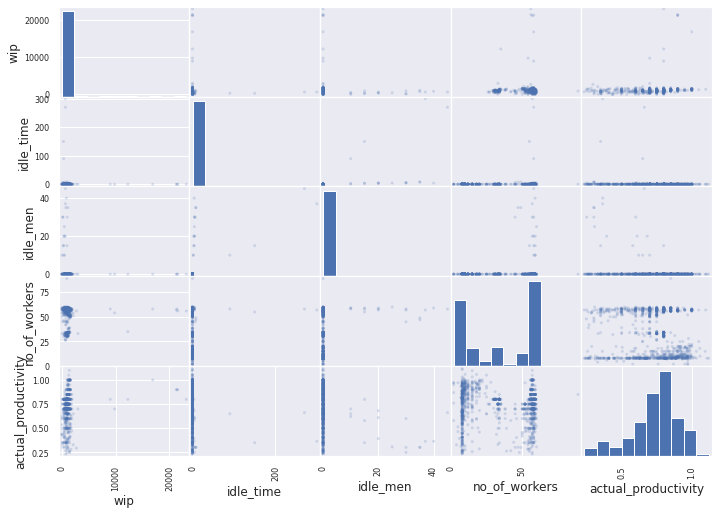

In [21]:
pd.plotting.scatter_matrix(data[["wip", "idle_time", "idle_men", "no_of_workers", "actual_productivity"]], alpha=0.2)

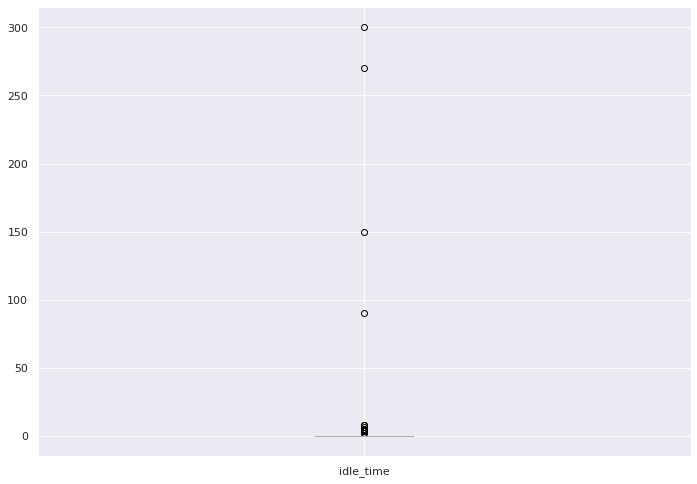

In [41]:
# explore with boxplots
data.boxplot(column=['idle_time'], return_type='axes')

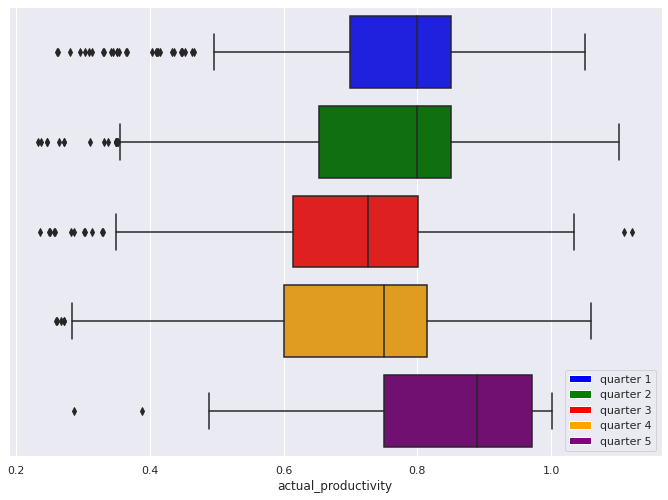

In [45]:
# quarter
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="quarter", data=data, orient="h", palette={"Quarter1":"blue", "Quarter2":"green", "Quarter3":"red", "Quarter4":"orange", "Quarter5":"purple"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="quarter 1"),
    Patch(facecolor="green", label="quarter 2"),
    Patch(facecolor="red", label="quarter 3"),
    Patch(facecolor="orange", label="quarter 4"),
    Patch(facecolor="purple", label="quarter 5")
]
ax.legend(handles=color_patches);

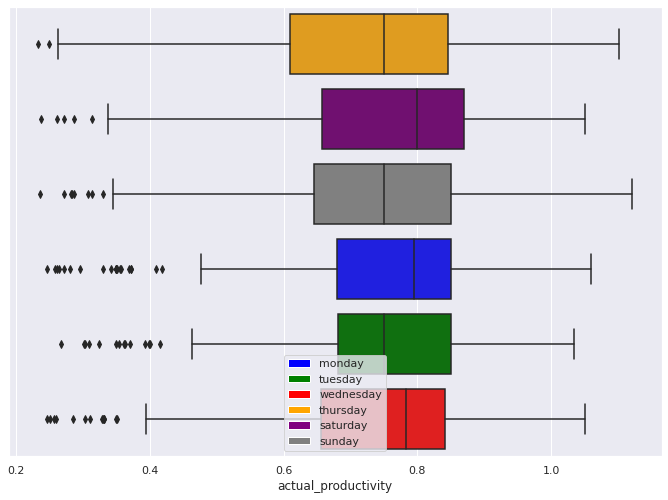

In [47]:
# day
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="day", data=data, orient="h", palette={"Monday":"blue", "Tuesday":"green", "Wednesday":"red", "Thursday":"orange", "Saturday":"purple", "Sunday":"grey"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="monday"),
    Patch(facecolor="green", label="tuesday"),
    Patch(facecolor="red", label="wednesday"),
    Patch(facecolor="orange", label="thursday"),
    Patch(facecolor="purple", label="saturday"),
    Patch(facecolor="grey", label="sunday")
]
ax.legend(handles=color_patches);

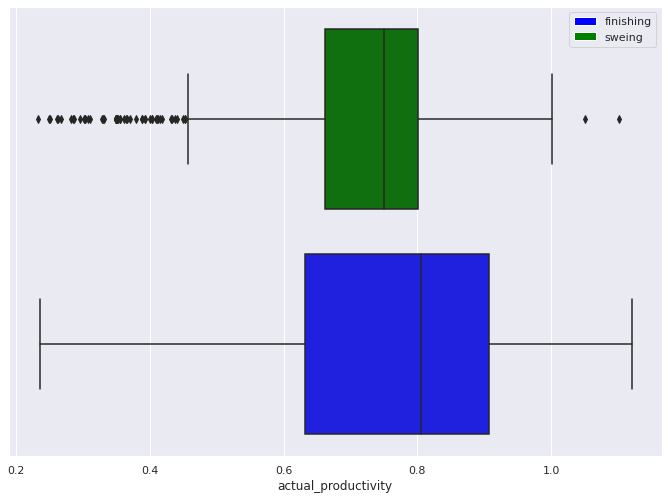

In [52]:
# department
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="department", data=data, orient="h", palette={"finishing":"blue", "sweing":"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="finishing"),
    Patch(facecolor="green", label="sweing")
]
ax.legend(handles=color_patches);

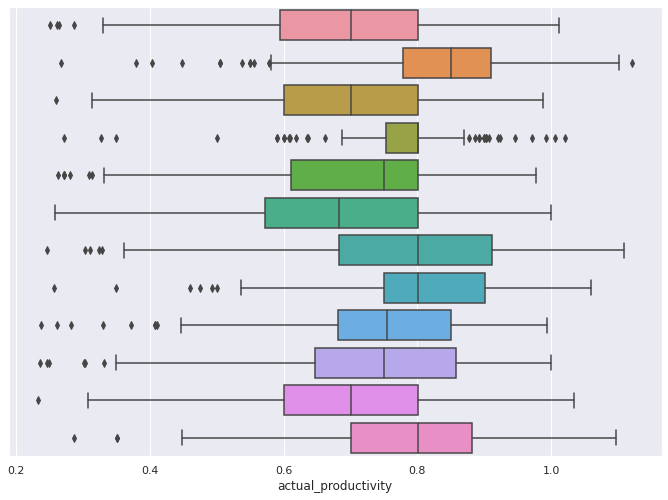

In [60]:
# team
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="team", data=data, orient="h", ax=ax)

ax.get_yaxis().set_visible(False)

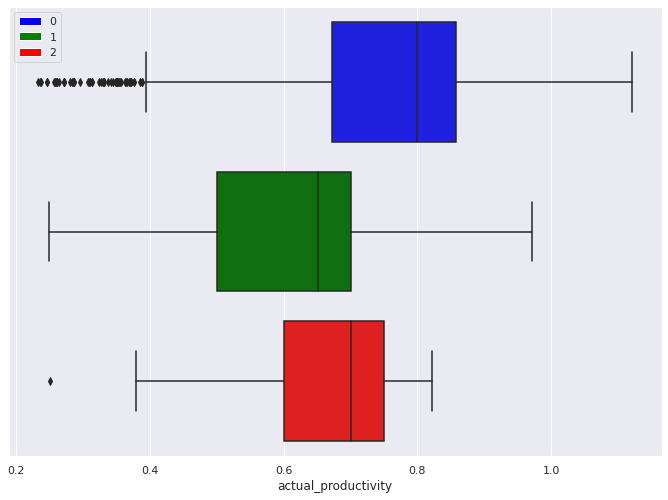

In [61]:
# style change
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="no_of_style_change", data=data, orient="h", palette={"0":"blue", "1":"green", "2":"red"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="0"),
    Patch(facecolor="green", label="1"),
    Patch(facecolor="red", label="2")
]
ax.legend(handles=color_patches);

In [62]:
data.to_csv('garment_data_understanding.csv', index=False)

What does it mean that the number of workers per team contains some .5 values? How is it possible to have half a worker? Maybe we could fix this issue by rounding down the numbers.

When considering the presence of problematic attributes, it does not seem to be an issue for the analyzed dataset since all the groups (eg. teams) are almost equally represented and there are not minority classes or ethically sensitive attributes. This would have been the case, for example, if one attribute would have specified the number of people with disabilities per team or the number of women employed.

As for risks and biases, it would be interesting to know how the data was collected and whether there is or not a specific criteria to assign the teams to a particular departement each day. It would also be useful to know how the workers are assigned to the different teams.

Even though data seems to be quite balance among different groups, we might have a sampling bias for the different teams. In this sense, a domain expert interview would be very helpful.

It would also be very important to ask about the missing values in the wip attribute, because maybe they have a specific meaning (eg. they define the non-importance of the attribute) that is not clear from an overview of data.